In [1]:
# Access astronomical databases
from pyvo import registry  # version >=1.4.1 

# Moc and HEALPix tools
from mocpy import MOC

# Sky visualization
from ipyaladin import Aladin    # version >=0.3.0

# For plots
import matplotlib.pyplot as plt

import pandas as pd

# Welcome to VizieR example workflow

[![Vizier](https://custom-icon-badges.demolab.com/badge/Vizier-gray.svg?logo=vizier&logoColor=orange&logoWidth=20)](https://vizier.cds.unistra.fr/viz-bin/VizieR "https://vizier.cds.unistra.fr/viz-bin/VizieR")

It is a generic notebook, highlighting what can be done once you chose a catalog. This workflow is suggested by [CDS](https://cdsweb.unistra.fr/) (Strasbourg Astronomical Data Center, house of [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR)).

--------------------------------------------------------

Modify the <a href='https://vizier.cds.unistra.fr/'>VizieR catalogue</a> name (variable <b>CATALOGUE</b>) and anything else you might feel like exploring!

## 1. Setup

This example notebook has the following dependencies: 

**Required**
- pyvo : this library facilitates the access to the Virtual Observatory (VO) resources. VizieR is part of the VO.
This notebook needs version >=1.4.1

**Optional, for visualization**
- ipyaladin : this is the Aladin-lite sky viewer, bundled as a jupyter widget. It allows to plot catalogs and multi-order coverages (MOC)
- matplotlib : an other option to see catalog points and MOCs

## 2. Metadata exploration with the Virtual Observatory registry

This part uses [pyvo](https://pyvo.readthedocs.io/en) to connect to the VO registry.

In [2]:
# the catalogue name in VizieR
CATALOGUE = "J/MNRAS/478/4513"

We first retrieve catalogue information.

In [3]:
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

In [4]:
# We can print metadata information about the catalogue
voresource.describe(verbose=True)

GALAH Survey DR2
Short Name: J/MNRAS/478/4513
IVOA Identifier: ivo://cds.vizier/j/mnras/478/4513
Access modes: conesearch, tap#aux, web
Multi-capability service -- use get_service()

The Galactic Archaeology with HERMES (GALAH) survey is a large-scale stellar
spectroscopic survey of the Milky Way, designed to deliver complementary
chemical information to a large number of stars covered by the Gaia mission.
We present the GALAH second public data release (GALAH DR2) containing 342 682
stars. For these stars, the GALAH collaboration provides stellar parameters
and abundances for up to 23 elements to the community. Here we present the
target selection, observation, data reduction, and detailed explanation of how
the spectra were analysed to estimate stellar parameters and element
abundances. For the stellar analysis, we have used a multistep approach. We
use the physics-driven spectrum synthesis of Spectroscopy Made Easy (SME) to
derive stellar labels (Teff, logg, [Fe/H], [X/Fe], vmic, vs

We can also inspect in details the `resource` object and access the attributes not provided by the describe method. See for example, the first author of a resource: 

In [5]:
voresource.creators[0]

'Buder S.'

## 3. Access the tabular data of this catalog

We can have a look at the tables available in the catalogue.

In [6]:
tables = voresource.get_tables()
tables

{'J/MNRAS/478/4513/catalog': <VODataServiceTable name="J/MNRAS/478/4513/catalog">... 107 columns ...</VODataServiceTable>}

In [7]:
# We can also extract the tables names for later use
tables_names = list(tables.keys())
tables_names

['J/MNRAS/478/4513/catalog']

The actual data can then be access using any of the ``access_modes`` of the voresource.

In [8]:
voresource.access_modes()

{'conesearch', 'tap#aux', 'web'}

The web access is found by following the ``reference_url``

In [9]:
voresource.reference_url

'https://cdsarc.cds.unistra.fr/viz-bin/cat/J/MNRAS/478/4513'

### 3.1 Execute a SQL/ADQL query

The ``tap#aux`` in the ``access_mode`` response indicates that we can also do a SQL/ADQL query for these VizieR tables.

On the first table of the catalogue, we execute an <a href='https://www.ivoa.net/documents/latest/ADQL.html'>ADQL</a> query.

In [10]:
# get the first table of the catalogue
first_table_name = tables_names[0]

# execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = voresource.get_service("tap").run_sync(
    f'select TOP 1000 * from "{first_table_name}"',
)
tap_records = pd.DataFrame(tap_records)

In [11]:
tap_records

,DEJ2000,FieldId,GaiaId,Hmag,Jmag,Kmag,RAJ2000,RVnogrobst,RVobst,RVsynt,...,f_[Y/Fe],f_[Zn/Fe],flagcannon,logg,ndfclass,recno,sobjectId,splabeldist,vmic,vsini
0,1.924069,6210,577648160437754240,12.409,12.745,12.373,133.753053,25.617,25.093,25.448,...,0,1,0,4.05314,MFOBJECT,74283,170313001601084,1.776668,0.999,5.854
1,1.937790,6210,577651832634896768,11.337,11.638,11.245,133.982267,-11.588,-12.029,-11.172,...,0,0,0,4.13750,MFOBJECT,74609,170313001601069,0.865279,1.100,4.830
2,2.001215,6210,577652592843967744,11.129,11.375,11.090,134.035058,33.272,32.711,33.400,...,0,0,0,4.20284,MFOBJECT,74685,170313001601063,0.667864,1.318,9.044
3,1.964686,6210,577654310830903424,10.285,10.814,10.179,133.865983,NaN,NaN,45.656,...,2,0,2,2.49621,MFOBJECT,74437,170313001601076,0.325385,1.222,4.762
4,1.985252,6210,577655375982779520,12.022,12.386,11.927,133.994153,15.379,15.101,15.386,...,0,0,0,3.68880,MFOBJECT,74624,170313001601067,3.743851,1.094,4.519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.474038,942,1732174260537095936,11.127,11.386,11.032,317.996867,5.477,5.157,5.743,...,0,0,0,3.89083,MFOBJECT,306491,170906003101308,2.179442,1.297,8.935
996,4.434372,942,1732175291323438592,11.605,11.959,11.550,317.886023,-5.794,-6.285,-5.668,...,0,0,0,4.04241,MFOBJECT,306342,170906003101301,1.866754,1.076,6.333
997,4.470756,942,1732175703640296960,11.228,11.568,11.157,317.961869,18.323,17.775,18.590,...,0,0,0,4.28260,MFOBJECT,306447,170906003101307,1.477766,1.161,7.978
998,4.493089,942,1732175948453939072,10.987,11.343,10.899,317.923186,-33.230,-33.660,-33.209,...,0,0,8,3.97203,MFOBJECT,306396,170906003101302,3.833878,1.200,13.938


<!-- section position -->

We will explore the other access modes here.

### 3.2. Execute a cone search query

We use the Simple Cone Search (<a href='https://www.ivoa.net/documents/latest/ConeSearch.html'>SCS</a>) protocol of the virtual observatory (only available for tables with positions).

Adapt the radius and position of the center to your needs.

In [16]:
conesearch_radius = 1.7  # in degrees
conesearch_center = (318.195317, 04.287196)

In [19]:
conesearch_radius = 1.7 # in degrees
conesearch_center = (270.0, -73.0)
conesearch_records = voresource.get_service("conesearch").search(
    pos=conesearch_center,
    sr=conesearch_radius,)

Star_ID = conesearch_records['StarId'].data[0:len(conesearch_records)]
print(len(Star_ID))

370


In [14]:
x = [(7.1879467492863185, 1720.0824264526188), (3.2822943536985, 1455.106624335366), (7.885968405472186, 1292.8823597873181), (8.815489880569471, 219.44378091099114), (9.291718627605448, 2789.669045305196), (10.305383812057787, 554.2046184320491), (7.458665312806567, 1004.3151685346461), (11.438379798549036, 1271.6804449126923), (1.4079836410996367, 254.0036897175722), (10.049420093701235, 1134.8580440672756), (10.961520037472459, 952.6213970267677), (10.114619016557379, 2156.2866429702485), (6.996519866001618, 4371.793403129244), (3.090048012452253, 213.58327564213025), (1.7058109967914132, 242.9087528770129), (11.68718120668633, 1876.6265377854509), (4.373995630624216, 1904.6275411693066), (6.918697234540399, 1407.6092772960274), (6.687815262043566, 240.72928780595822), (7.749941948732925, 1455.7490904525084), (4.8255388561828045, 221.09037333306335), (5.132074783367388, 190.62251167224952), (5.674572926952433, 991.0855017923769), (7.532366761695659, 180.02986556708566), (9.042991556237784, 1007.8785100568458), (8.37265344399112, 237.19089354216965), (7.972049010661771, 1128.3470026250468), (5.328593251204861, 207.25698290825602), (5.421450051664253, 2380.2331431628186), (8.081627385133029, 1792.8314872560868), (4.080215924299217, 2221.4394421522557), (7.834621842045401, 218.36960335476797), (8.097981397642158, 246.12389449195737), (8.033566447897236, 4958.564296351842), (3.8974845367193405, 252.28396152188313), (5.601132103259124, 210.45387303358513), (3.7997489358885015, 1905.4176237043434), (4.560826779432525, 435.54808637737233), (5.189941040974652, 1517.7465580075886), (11.630719116022775, 1145.9479342157542), (5.211907843482571, 955.907561821351), (5.888519777393266, 302.95695239543994), (11.528169784453155, 1182.3585121927122), (6.444100196662148, 220.17916183396505), (7.0962766600474, 3549.5089471903498), (8.103231918691447, 239.78970656220338), (12.260046590542206, 1245.3459663586896), (7.382652038469031, 274.28230544678627), (4.736063609867278, 279.93665642737375), (8.033870659571727, 1640.6741526130081), (10.242867642938977, 1944.5068599286242), (4.100087983869157, 1184.5364941134355), (6.531773338443618, 1305.3558527049183), (6.543103501943969, 2540.2831990800046), (5.983006765449341, 3844.0671291946), (5.273727500012661, 189.78797957838614), (9.905858780587847, 243.32660292736972), (5.516143084769179, 226.5327385002764), (10.492706787312056, 1538.7610874830016), (8.284545634452545, 208.3977898208586), (6.099840624301376, 232.18818732038204), (3.887404251593407, 1137.1584985667985), (8.150781996965902, 213.70142188857733), (5.6646415533443175, 224.37970715836465), (6.434780638614796, 890.1377076174077), (4.049185106822373, 223.20966662004363), (7.02980493677461, 207.20175224523655), (8.311989829773545, 211.73291283541712), (8.188901442026875, 228.36236509523943), (8.414719376260468, 220.18188956545634), (7.288768401912466, 225.31814701341963), (7.179952899644897, 229.24669443163722), (6.823311286927345, 246.16677381512392), (8.419918289328358, 1720.41211528691), (9.18194139227426, 227.41751261945575), (4.2047716396525825, 380.8914413232161), (6.462135547788246, 198.96368011313228), (8.368091431594737, 235.73916943744544), (8.673526039960608, 210.68740903036928), (6.262823345984659, 210.9901449368601), (6.424837350294463, 228.4293508954138), (7.303016495502723, 228.96735823858742), (7.913709184591291, 219.4425473435965), (6.524287979580443, 218.81284502819), (2.3020665218908554, 232.55968254128442), (9.52131334495254, 232.0335086474746), (5.667635455954041, 235.47716003445342), (8.658403467478065, 226.95120749580613), (7.689376526326533, 258.740882017918), (7.306050850751609, 239.0226305977551), (6.49894813169104, 251.87984193241576), (8.36923753544288, 252.46709053587966), (4.606473157459815, 211.94636109646805), (7.658620524675419, 1089.9875782037705), (6.409034306094594, 894.1575399194244), (7.621139014630041, 232.31029888273017), (7.69966594827434, 227.7197548317611), (9.542232551361424, 1241.1973276695155), (8.550130248820683, 239.93427951831026), (6.245619333346027, 285.30572808814134), (5.388820499826756, 206.59165569493874), (6.486189766921115, 233.35398575699077), (6.6766283736847045, 221.3460478405686), (8.638946774208836, 2534.860813583895), (9.144737344442147, 230.99380359631562), (7.604056295216165, 225.43339399473777), (11.890211384840207, 2950.2438481682843), (10.44097762740303, 1549.4881056021818), (8.108186675767149, 216.432563770456), (8.209320232875468, 223.9443638694537), (7.185938291177668, 225.48327967377554), (1.2022644346174132, 222.04465495309586), (3.138091992588652, 6119.284268153915), (7.0728831102601, 234.32073432348085), (7.968521796550558, 224.30590333170022), (6.414305539878284, 227.09359676371704), (6.631887225695847, 204.05379139782482), (7.790273345612234, 223.4198418792659), (10.063850624357947, 1418.502479217832), (3.8766308500612534, 250.2556802002514), (8.3958562504334, 218.91851921047422), (7.296098770198499, 605.0736473429185), (9.110973794922188, 242.47060216433673), (6.919550831137502, 1788.6611617062501), (5.176217119522614, 226.1972418226405), (8.582771966539319, 221.64069512211498), (5.2535526532853485, 224.48425158175593), (9.061733274666015, 236.70066551047742), (4.941663538582884, 122.96581064849876), (3.803916576512987, 219.95993071685874), (8.652994144617239, 249.28980088970889), (7.745624263879799, 226.95879416384653), (3.949268067666255, 224.47741367332625), (11.065478041756505, 4574.286617933338), (9.58263929918259, 1886.4743628431745), (6.42415501324348, 210.89734361840306), (8.953913216164189, 1419.0760369041925), (4.391918183145526, 7496.989972302812), (6.676857676729107, 226.59112623956977), (6.568228324550055, 236.23923272937355), (1.2589254117941662, 233.4660459302351), (3.8263068156218982, 248.5653226767453), (9.88296348957376, 1797.873239835918), (9.035309354777418, 244.2025978901012), (8.005362387384972, 517.5059160698447), (9.302846475412512, 952.4153699176974), (6.371571262114577, 507.8807468023988), (5.286041763692748, 363.23718914019713), (9.871542353601964, 244.9940983645954), (4.875764170227842, 1782.72917349727), (3.5083735749133247, 1528.3941485908922), (9.294201492132727, 817.7783133083316), (7.500755033458539, 3157.7151664527128), (7.8468517192830625, 1387.910923183811), (4.7968345408314255, 392.61499229606113), (6.224949660395658, 854.589703739606), (6.012501615319503, 2168.7425867752527), (10.672510053201364, 1201.825981045795), (6.491756097775472, 221.92648674954415), (6.98450364894621, 219.40672286911874), (8.628553569085659, 255.70561499725432), (9.972716799397901, 1607.0965963931098), (4.650166631285347, 227.18848213434794), (7.701402462832107, 1348.753860742823), (8.081717035953687, 289.3611753287444), (2.437358343581248, 2010.3494889182507), (7.8667542541333715, 1895.0833401428301), (8.68209482103674, 359.66332753126727), (6.292325297112911, 223.01693818907546), (5.4286440973184, 7916.735642402389), (7.951866776424046, 1061.1807627417982), (6.018336478221932, 3093.9725213905813), (9.759459955997883, 2011.872913229012), (8.015706093009817, 720.9712204474342), (5.425424331030902, 214.8717252415573), (5.959529162501204, 249.6767236083329), (7.384858909833711, 1040.623332071649), (7.976797769955243, 1211.307917514543), (7.106781271705888, 1673.932665244694), (7.745285996725919, 226.90946633815173), (11.849681415761088, 1629.6221870824156), (5.471376183655114, 230.03341660078115), (8.959253990136958, 247.4768951274737), (8.616651147912224, 1007.2379198392679), (8.26098732453687, 949.8962448977451), (9.070838100106442, 2306.5776216958648), (6.186632642643559, 241.60059047478913), (9.91074974877969, 1572.2083116563208), (4.054773424344666, 231.72890256779004), (9.163599356332094, 2545.539103280699), (9.370262947349557, 901.4496353276423), (8.556675125804786, 249.81253863823477), (5.2520144621885505, 983.4012241386622), (6.508827892793129, 1305.3397102396434), (3.66212303791677, 1591.4311472421844), (7.445002113712689, 2637.62930437101), (0.714170787856521, 234.29902891327058), (4.3651583224016655, 1428.996786637451), (7.808836817275205, 242.60998011690342), (4.3651583224016655, 1279.0635475471283), (9.44064999425072, 2621.9338619214222), (6.1367092615251995, 1574.7098811196772), (5.407081073724173, 1748.145170285444), (8.612319653051783, 4714.476938639769), (7.555449419483504, 1003.5578636995906), (5.146515856045716, 2888.851302026356), (5.120288583072341, 6618.140090306269), (8.744018802382483, 2569.498076144928), (8.27487003644366, 7258.877757379874), (10.258375171845284, 2301.186236406964), (3.019951720402019, 953.4234747268399), (8.379574592504788, 271.6225984013844), (8.400514477883751, 3317.283037704722), (11.138924745119052, 1722.1749653399966), (11.824436577637098, 1626.6127912825975), (3.9221891456840856, 1118.6768903242146), (10.172470954206489, 1408.3441332264551), (9.422552341035313, 461.8513537040597), (6.25154567291474, 329.31260116621394), (7.176936471389139, 1622.4410866387523), (8.225235742916473, 254.9641448387773), (7.835935814066953, 388.099613437031), (6.944066592849388, 382.4270833462652), (4.158159981696247, 3720.3516873258764), (12.087569608058223, 1631.3438805856065), (3.977506944411318, 999.932807931379), (6.821167131035109, 1726.0560678300508), (5.988668610729541, 922.79782450806), (8.177768351186373, 399.5655226367494), (5.187617249807023, 149.7254859710658), (8.755555145778546, 1170.5973287434797), (7.335823137488653, 890.2887876707637), (4.550372210399644, 901.7750478420688), (8.304255215035676, 861.6920082001322), (9.79263164470694, 6045.108781493618), (5.683116121669623, 1586.6218815500224), (6.654852121277508, 1549.2961968486686), (11.161994761122136, 1455.728798211395), (10.67536375621359, 1348.5230917217796), (5.824298431499726, 2998.6774348717645), (6.753679087217379, 1225.272936716957), (6.800693950659225, 5780.770490241657), (8.181929723531198, 1274.2062191213365), (4.742093671559008, 2010.658065365492), (9.65660731023146, 1279.3900396809534), (8.521181895112424, 502.0356907799933), (4.1186339271132875, 4512.6796038138955), (6.743594498485177, 1512.6717539425701), (5.8709045149633, 1507.1811202506362), (2.2281631664322474, 4885.248788827793), (11.475777210046331, 980.0531051045037), (8.871364725351881, 1089.4749764261346), (8.086409418125898, 1506.7644392464397), (7.4182558676751436, 1247.4903358608485), (6.630179960924927, 1692.689102022859), (4.004771699129896, 1651.2019576654777), (6.095753806966931, 1807.0863114746899), (5.1600641318791975, 2374.3396585647843), (5.677688264704861, 1331.4589811647008), (8.369828518466283, 1151.6990572430614), (7.249344952260759, 2466.691467059542), (5.4761206199264265, 1911.1767786872797), (10.950732757608387, 1160.838721200157), (8.85335744554243, 802.6812694132024), (10.073711299772752, 1956.964662926656), (10.645468793305042, 1450.1803338961765), (11.946328045003558, 2533.6436857393855), (9.429289072157799, 781.9119456750814), (9.427371270669177, 967.3242622698293), (10.18937333406322, 446.2377257177989), (10.735996351137075, 6370.342526745193), (8.874461747421861, 669.8854212222593), (8.630458193637473, 364.43898290550635), (11.372671516103445, 2414.273511310516), (11.378137806417403, 1601.9884170978764), (8.635249585443324, 2204.218597670433), (5.525644367570641, 1878.9024405685661), (12.589254117941662, 3075.990196544824), (9.774533000172083, 1038.8285339890786), (8.211526308392829, 1198.9975186475538), (8.500075410796686, 293.75828231058364), (5.7454345209763185, 3528.9623449659152), (7.2205334576580835, 1368.7258111791891), (6.267410809239039, 1161.281753936591), (9.365649653080888, 1374.8507100652546), (9.020048825033161, 2782.570460371329), (6.710902621326026, 233.5653656165449), (9.988992146836106, 483.728506616647), (8.8185025825807, 2758.571431274773), (9.930178381267513, 1587.5940671375467), (11.92136848987879, 5400.54052390125), (8.029935802219432, 342.78217699691515), (5.274182512786602, 1289.5786636208393), (5.539549112250787, 2255.979267474876), (7.221423092794374, 1610.6488059735184), (5.882334556592172, 1649.3346598026772), (10.696100405282039, 1476.2417850790305), (5.744408281455786, 791.9266896394262), (6.23269849509985, 1196.2002749574606), (5.009315106110038, 3409.1441847962283), (5.917056606385433, 1203.6804383956485), (4.257411218545712, 730.7766498451737), (5.5615117055326655, 1401.9280640028403), (7.633425005218512, 2743.4025191120713), (7.885208455765426, 3046.0617337906274), (9.715704953833226, 458.6592561394482), (6.210965098978325, 1580.2482941834846), (7.2327389300066045, 2289.0243841223414), (10.461705791748711, 2855.5005127425406), (7.1096432531739815, 973.7308564907663), (6.0963583586161585, 1821.2941170334682), (4.655538453323706, 2437.868913175375), (4.174378724659329, 1947.0645646428538), (9.546633686201, 925.9464254570039), (7.540630097891391, 1327.8522313612566), (10.254365644127555, 1156.9739084853638), (5.661762412650032, 2060.349294093441), (5.2362443448403315, 3101.1960547679355), (4.439250984912284, 4156.183978423747), (3.5180351927315874, 1297.8484810104073), (6.862637973134845, 5630.21835488206), (7.729955811394165, 2841.707614983786), (10.714348983988524, 1638.394998605084), (11.20472668806197, 1923.2277634590755), (5.932181967321045, 3982.1703526576034), (5.220366016467997, 854.0703645716522), (8.93243365939217, 248.21881653718467), (10.264748018084605, 525.9883991912175), (6.436813891225943, 1548.9920793429765), (8.11634764642228, 1613.7928983373833), (4.874328666038491, 1324.6851871055244), (11.945461692164782, 1717.0566436672405), (5.816799041555269, 1538.1944458911184), (11.759933696286478, 3057.0841586051647), (9.977311672605941, 3901.544492794678), (10.756208118602125, 2022.977369297271), (5.102463915013097, 1994.8746770076175), (6.989407096216288, 2571.169223267753), (4.714125194725698, 362.9395979243065), (11.65104036882736, 1181.1106303252304), (7.723265393031836, 2158.1788626708326), (2.7011937063261047, 1845.2425417004638), (6.473440581901527, 1270.4021393631162), (12.137442831001534, 2404.5410043199254), (7.0093329525643115, 1553.204235648941), (6.7907506164582845, 1345.1927023139615), (6.203497894072146, 788.602974852356), (7.03468203261001, 480.41012665714874), (10.221121350416587, 2183.6981858259655), (10.003547425445532, 3040.9650794621566), (6.867713962032675, 2567.8245589185995), (7.498478450453156, 208.58220010157382), (10.3905653108581, 1028.9815825157625), (8.893557995564302, 1672.6008049900663), (8.847864615237762, 1584.7291027904998), (11.72573934315799, 1203.1944500231195), (10.243514720243407, 1860.5719754445533), (7.790293683979132, 2756.344122679651), (8.11197146406292, 1960.6040915448013), (10.24474381444289, 2798.7075491099977), (8.747364976750553, 1838.3091159176179), (10.779971007149914, 2762.98049795744), (4.661536078771012, 236.9465853972006), (11.534525155834611, 1817.4371506637817), (7.348046789349004, 234.5290238829143), (4.297758366922538, 1131.1567289099405), (7.551182631918455, 1974.9825566194775), (7.51411888805707, 1897.6458608059238), (7.475620233127225, 2260.032989847414), (8.438451524107936, 1276.3434304926004), (7.947288889023596, 2231.705228714419), (6.412025600952167, 1573.3934071825686), (7.349888171660926, 2680.718880055185), (8.60749688091074, 1479.3636878403531), (6.464553868181839, 1781.3194760138074), (4.32306833962372, 3599.250342574314), (11.697340476446929, 2677.074485022639), (6.086276633011677, 4055.7421637615694), (9.83724978536538, 1585.971749514611), (4.384981987591485, 1956.5422663419806), (5.736814564006128, 2074.9454066097896), (3.115151001825399, 1543.1513979615681), (2.2839928080356056, 631.6029258082322), (4.484309897856607, 1478.80309235506), (3.095716849656448, 355.52749814182334), (7.912161173659502, 2851.8322097036316), (5.442209033311405, 2240.9516127460433), (5.391609816643039, 2032.6102132964597), (8.67480298933826, 312.5924149237104), (6.93976543727879, 1650.9373315617922), (8.658100934224086, 2086.572237813664), (2.352347775261975, 1327.1022436758906), (8.152047517284116, 2308.4900366347883), (3.3552216595353297, 193.89040745809018), (8.969064165595453, 2810.8062594770304), (8.450473474810648, 7603.901299109637), (9.129112370909601, 2230.285696538683), (10.957339101523177, 1403.3479239744931), (7.777783263858883, 1319.9273035018073), (4.950409104371962, 1296.7166811673624), (11.711766193469582, 1780.4332688888721), (6.383815787825786, 2254.279339836677), (3.5881366744644825, 4122.991286946643), (6.700455318256144, 966.9095989767645), (7.33188313729186, 578.8589546720837), (8.858665673088405, 1233.4008700533996), (3.7838942516579563, 3238.8088521545974), (6.245597830633063, 1951.0946517855512), (5.880049910986897, 1946.7956949745314), (6.655747674481732, 4330.032510632891), (8.199081971411399, 2578.3547351272364), (5.751867434733296, 4123.777421165271), (4.373144072244988, 1516.4131937916452), (3.318799004194503, 3446.0433357071174), (8.065638496303148, 1500.019644247267), (5.151041878715769, 1321.4238516295188), (4.562371420081148, 3361.2790003388104), (3.973419240715196, 1310.4204835146245), (3.6034929783454746, 3052.95613269109), (9.174890261638147, 1547.1324591609816), (4.052406225605333, 761.2995499960572), (6.8080237721190535, 5386.064204027719), (5.932880064583159, 2727.805726992404), (8.243554250055867, 3735.807846742041), (3.430278981897814, 2598.329015323382), (5.957321281005292, 1393.4460298118277), (3.9014418166805584, 2721.11142960844), (4.796147366142363, 2275.9345038565125), (3.204444603651678, 1821.4085888808033), (4.080813716758713, 4218.6680002949115), (8.38994840627828, 1086.1165088996145), (8.303661763602621, 2054.3093718179534), (3.6833369377858722, 787.37891399059), (6.464195733108559, 2879.0976209816017), (10.537911628906075, 1986.7973818078162), (9.602271892267645, 1677.5383026177767), (3.974745818419738, 1388.0954212552788), (7.70819254802889, 5183.61173284677), (11.911940470855875, 2781.5469101530907), (6.747528650852982, 494.1622522060161), (2.74315925216189, 2335.9201353780836), (7.085363847520638, 947.0817559498304), (3.826818776171078, 523.5837382268749), (4.018851347355751, 4112.481232336101), (11.694246060985169, 1617.691751824624), (4.53924306952909, 1181.963924930724), (8.4198948174231, 683.2929621571061), (7.445560800192824, 2129.9956289896213), (3.240174373919763, 1396.8296492999145), (6.8883275733208995, 217.81552784761584), (8.49099598034291, 216.804996872466), (4.993313189740381, 1913.86202857192), (7.4479327247741445, 2085.77255279061), (2.884196385533562, 210.14608220856144), (10.748337622962966, 3112.581423548423), (10.162660015917004, 2250.3464012451695), (8.56540097254848, 4654.519111755797), (10.718253433047494, 4241.097982988259), (3.5662178091847148, 1368.752956842512), (9.599561396135716, 1820.6982097334314), (6.665129157506707, 970.5482301091927), (3.6975534568257724, 4369.5746264064155), (3.804931084988802, 1295.2389196188615), (6.089770754595692, 1176.4239692114302), (5.808588572667736, 905.5241180063131), (7.652566821269505, 529.8380775928644), (7.266360683265732, 395.04208604180224), (4.787881130364018, 941.823301785768), (5.798261561716642, 1063.7405682264687), (5.5828864777233775, 1887.6125012843006), (7.728078988322596, 1927.712556369212), (12.248430519587037, 2389.395019233582), (3.6508534847001863, 5084.529294296955), (8.599266332487733, 535.4308559693065), (10.758492178403529, 4519.689140401773), (9.821971999443047, 528.4254942258816), (9.88402378199982, 2449.600773709594), (12.589254117941662, 1361.199958849903), (8.757934706579915, 1290.3106523839765), (5.781319854946127, 485.9979302728854), (11.706909817169139, 2966.8382949572106), (4.892624437133729, 215.13530852756378), (8.0953484868415, 245.87314752056287), (8.579145413734052, 227.57482164168678), (7.265727586197693, 198.51650123269198), (10.834206999676535, 1122.254183491981), (6.759317260909356, 243.7367174588938), (10.575998531998449, 234.9419910797828), (6.727787107296525, 208.00260163278978), (7.610609938430218, 234.484507478119), (9.968442023529809, 229.38782682909718), (10.038251355391404, 256.9748831753471), (4.712416473417706, 2194.7690625153914), (8.819985599818123, 247.8432644747184), (8.486959682053405, 475.9109906643303), (6.158067802431089, 765.3446661279921), (10.816257660711981, 498.2929609051926), (6.402288897167738, 1721.412767416053), (6.95507625422791, 1072.0779001483813), (0.8075200648035155, 430.2492795913962), (10.20784198272013, 2425.334425029958), (5.083584911307993, 1476.0062604305947), (5.115113045372977, 1200.7078795761033), (9.850509696568778, 393.88415018531043), (5.5854808703065135, 1665.4809330975622), (7.278593604810761, 1613.7156220276017), (4.462368302456425, 392.47673925012265), (11.655827642967738, 2295.5118778950036), (9.081292871116029, 213.48054641806206), (1.2589254117941662, 202.90631200190583), (8.788948293830835, 210.15582677712345), (1.123812569044462, 211.61511198081905), (8.04329617527318, 215.73571077843786), (9.097232991817338, 212.52598130169218), (8.955265154228975, 216.07514336580422), (6.423595838879306, 212.31885670555005), (6.125832768876224, 1377.9005329995557), (9.654195800376305, 1677.0303510130188), (9.073808609744288, 2085.6398760567085), (5.879359231841601, 1614.0723320146974), (9.744411768873913, 851.6668808001969), (4.784331006845485, 1025.1909203889154), (8.106945866586477, 1683.2470944299444), (11.104472788148215, 1634.963810738628), (7.355779710917936, 1676.1337916275836), (3.3047585219989193, 1487.0543287281037), (7.8511486345629775, 1934.3134002024187), (6.074066185111983, 427.99900072564407), (8.859105138775583, 2996.800740456027), (9.284206228462436, 1694.4196212565196), (11.006821392024198, 1693.4310042650225), (3.8608920619760885, 1508.0465554155523), (10.807536607141905, 1702.28842953088), (6.595704753854336, 2240.402382197509), (8.439030322163772, 906.3317046218527), (6.10584675227935, 1057.392535540419), (4.764788033541927, 368.4472916787149), (8.16190801922648, 1861.9843185918123), (8.507162624194148, 1939.7339825602248), (7.940188489847619, 306.1202313040845), (11.224265975919305, 1479.413752657611), (9.620251452080113, 969.4270346979076), (11.024999779421377, 2188.4527255100215), (11.142151875195461, 1109.241426809313), (8.134889359708607, 3439.558290754673), (11.906766403264642, 3521.165642219291), (9.56897370910728, 1030.6995571007444), (8.645182989772344, 218.00183676552422), (9.677473998269575, 1451.4657487497484), (8.05021833688614, 235.03492724531597), (10.195643834975293, 2136.7715558095465), (5.17566969820896, 371.938627495653), (9.632334541342791, 1533.4459543054286), (11.234916014022978, 3371.667790414276), (11.202450454700362, 1890.075417522344), (11.212313759228383, 2000.5382946097475), (8.645521333784636, 734.6404081418074), (9.252080137615273, 1308.134195583834), (6.510958366771111, 1740.1834054548963), (3.2750749687681915, 1483.802898679913), (8.749999234280695, 1941.9782638660831), (4.6600296463753725, 1727.9154142600169), (5.443781862082852, 3337.1659468975254), (11.746746842781818, 1350.624996611746), (6.474719592439858, 1027.660392237207), (3.199434442036594, 1249.7219862349898), (3.2846528842750704, 1673.7687378976086), (2.3610733355812057, 822.06994815882), (8.00124812870128, 1852.7127380852746), (10.439845314865215, 3449.5046315355366), (9.284477677179309, 1727.9229990069816), (7.970676448008027, 1317.956677261221), (7.771087151809829, 259.45732148166127), (5.396169448906477, 298.72470007014954), (9.450017844460332, 3210.759554048665), (9.731311714549886, 802.5091803613407), (10.276689989946226, 772.250985301141), (8.29770669682749, 930.6028103483151), (8.993396636327665, 1571.0394122740586), (7.83286839431827, 1069.5006587937473), (9.547042639828824, 353.6525886275718), (12.589254117941662, 1888.894666926154), (6.620829018459228, 253.31140118468062), (11.031060240434465, 1902.5035841657368), (11.587363109298973, 985.9020367479727), (7.2328046596793145, 744.9134328989588), (11.045159192465174, 2695.9948350099503), (4.996571822902109, 1267.8731668280839), (7.982300034308471, 475.3708314406365), (10.678683276193315, 4049.3963196625145), (9.937431167886984, 1846.286928527786), (10.024991661718596, 6027.482347806001), (9.961642814287426, 1298.667640845269), (10.043208858625245, 4505.994180014891), (1.0972765250825214, 3827.1125282964103), (7.316391181853052, 899.8498771944974), (9.354011419227115, 1379.3242747343947), (7.352377477639291, 2284.4582069177754), (4.913274628273778, 1602.5239229438066), (7.588094717136162, 287.4600277752996), (8.642424867486577, 2274.0452937064993), (9.233706756906422, 311.68682940322225), (5.435711510770849, 904.2370974690692), (5.162320353851708, 1119.5694963564645), (11.937888375654506, 2313.6080251620274), (7.253356414007723, 1379.1879906939243), (9.124388109612134, 674.4438084985104), (9.926342491323291, 459.40518238334005), (11.381460379129939, 1306.3949839892396), (7.9867498224443425, 2285.5858988047153), (8.26990303934007, 2123.6704963512107), (3.3030142431639633, 1641.6199086617542), (8.129467431973476, 823.8286298059155), (1.556301479109221, 652.744667023018), (5.52613341899473, 252.6970861465431), (7.615191708029459, 2335.12836013421), (10.78871394958635, 1798.8170807898657), (4.844866290001842, 1310.202503939083), (3.112195394770015, 1367.4877203059746), (6.803820458973442, 284.87403831333336), (4.250104170940271, 567.122502480641), (6.671356564325571, 1858.2265510467835), (10.17437359092734, 1506.3492812801105), (10.448043539283763, 1729.7158014342842), (3.2351923821524635, 899.7532894670068), (7.942897277947362, 991.4632232480016), (6.171175038606157, 2039.8346021591071), (5.230088792821826, 1965.1295718616252), (9.04323569736681, 1533.2452977674718), (4.590637326702093, 1719.3607719603208),(7.734114978250483, 936.20310506995), (9.752738001127332, 1561.732224316454), (7.621532662034581, 2834.4494263660663), (8.798122292902892, 508.2186974537573), (4.708758568341805, 1624.8533123760603), (6.2828827920092545, 939.5787564742976), (3.368162123179582, 2935.431686634535), (5.477200269937297, 2121.2187059452367), (7.833858517661814, 1311.2889844212705), (6.10066945631762, 1043.1015082664903), (3.39419318873056, 1427.509041072883), (9.114961433898406, 445.2443268535142), (10.256245073661985, 1802.8941008430486), (3.0590458592419028, 1272.9877914195636), (11.785869101634205, 1593.1054324505192), (10.921098033057858, 2236.985077458392), (6.749394210928271, 1160.0926225904348), (5.626380301042986, 1487.6819799342697), (11.350613178372184, 1030.8696595481324)]
print(len(x))

649


In [17]:
import numpy as np
long = np.arange(270.0,360.0,1)
lat = np.arange(15.0,45.0,1)

for l in long:
    print(l)
    for b in lat:
        conesearch_center = (l,b)

        conesearch_records = voresource.get_service("conesearch").search(
            pos=conesearch_center,
            sr=conesearch_radius,)

        if len(conesearch_records) > 80:
            break
    else:
        continue  
    break
len(conesearch_records)

270.0
271.0
272.0


DALQueryError:  

In [ ]:
print(conesearch_center)

In [ ]:
0.0, -81.0:

## 4. Get the catalogue coverage

VizieR also provides the coverage of each catalogue with Multiple Order Coverage (<a href='https://ivoa.net/documents/MOC/'>MOC</a>) at order 10 -- meaning with a 0.001 rad spacial resolution.

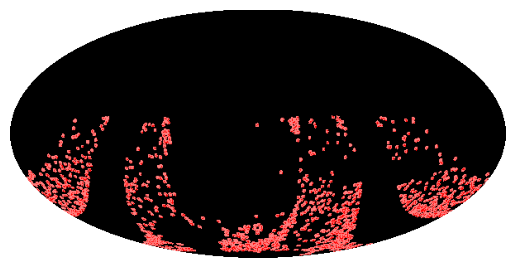

In [18]:
# retrieve the MOC
catalogue_coverage = MOC.from_fits(
    f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
)
catalogue_coverage.display_preview()

We can plot the coverage with ``matplotlib``.

TypeError: argument 'ipix': 'ndarray' object cannot be converted to 'PyArray<T, D>'

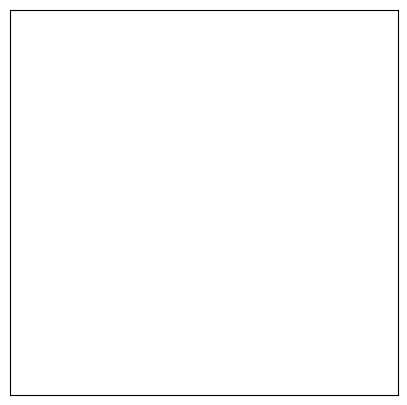

In [126]:
fig = plt.figure(figsize=(5, 5))
wcs = catalogue_coverage.wcs(fig)
ax = fig.add_subplot(projection=wcs)
catalogue_coverage.fill(ax=ax, wcs=wcs, alpha=0.5, color="blue")

or with ipyaladin

In [21]:
aladin = Aladin()
aladin

/home/advik/myenv/lib/python3.10/site-packages/traitlets/traitlets.py:842: DeprecationWarning: Deprecated in traitlets 4.1, use the instance .metadata dictionary directly, like x.metadata[key] or x.metadata.get(key, default)
  warn("Deprecated in traitlets 4.1, " + msg, DeprecationWarning, stacklevel=2)


Aladin(init_options=['background_color', 'coo_frame', 'fov', 'full_screen', 'grid_color', 'grid_opacity', 'gri…

We can add the tables and coverage in this ipyaladin window.

In [22]:
aladin.add_table(conesearch_records.to_table())

In [23]:
aladin.add_table(tap_records.to_table())

In [24]:
aladin.add_moc_from_URL(
    f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
    moc_options={"opacity": 0.5, "color": "pink"},
)

/tmp/ipykernel_128341/4176677260.py:1: DeprecationWarning: add_moc_from_URL is replaced by add_moc that detects automaticallythat the MOC was given as an URL.
  aladin.add_moc_from_URL(


For more information about manipulating coverages, see [MOCpy documentation](https://cds-astro.github.io/mocpy/).